In [20]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import xgboost
import seaborn as sns
import tqdm

import warnings # supress warnings
warnings.filterwarnings('ignore')


In [21]:
raw_training_dataset = pd.read_csv('train.csv')
raw_test_dataset = pd.read_csv('test.csv')

In [22]:
print(f'raw_training_dataset: {raw_training_dataset.shape}')
print(f'raw_test_dataset: {raw_test_dataset.shape}')

raw_training_dataset: (1460, 81)
raw_test_dataset: (1459, 80)


In [23]:
# fetch the house IDs whose price will be predicted
submission_id = np.array(raw_test_dataset['Id'])

In [24]:
numerical_features = ['MSSubClass',
                    'LotFrontage',
                    'LotArea',
                    'OverallQual',
                    'OverallCond',
                    'YearBuilt',
                    'YearRemodAdd',
                    'MasVnrArea',
                    'BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    '1stFlrSF',
                    '2ndFlrSF',
                    'LowQualFinSF',
                    'GrLivArea',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'FullBath',
                    'HalfBath',
                    'BedroomAbvGr',
                    'KitchenAbvGr',
                    'TotRmsAbvGrd',
                    'Fireplaces',
                    'GarageYrBlt',
                    'GarageCars',
                    'GarageArea',
                    'WoodDeckSF',
                    'OpenPorchSF',
                    'EnclosedPorch',
                    '3SsnPorch',
                    'ScreenPorch',
                    'PoolArea',
                    'MiscVal',
                    'MoSold',
                    'YrSold',]

In [25]:
categorical_features = [col for col in raw_training_dataset.columns if col not in numerical_features+['Id', 'SalePrice']]

In [26]:
print(f'Number of all numerical features: {len(numerical_features)}')
print(f'Number of all categorical features: {len(categorical_features)}')

Number of all numerical features: 36
Number of all categorical features: 43


In [27]:
# Generate correlation dictionary that contains {feature: [correlation, p-value]}
correlation_dict = {}
for col in numerical_features:
    raw_training_dataset[col] = raw_training_dataset[col].fillna(0)
    raw_test_dataset[col] = raw_test_dataset[col].fillna(0)
    correlation_dict[col] = [round(scipy.stats.pearsonr(raw_training_dataset[col], raw_training_dataset['SalePrice'])[0], 5), 
                            round(scipy.stats.pearsonr(raw_training_dataset[col], raw_training_dataset['SalePrice'])[1], 5)]

correlation_dict

{'MSSubClass': [-0.08428, 0.00127],
 'LotFrontage': [0.20962, 0.0],
 'LotArea': [0.26384, 0.0],
 'OverallQual': [0.79098, 0.0],
 'OverallCond': [-0.07786, 0.00291],
 'YearBuilt': [0.5229, 0.0],
 'YearRemodAdd': [0.5071, 0.0],
 'MasVnrArea': [0.47261, 0.0],
 'BsmtFinSF1': [0.38642, 0.0],
 'BsmtFinSF2': [-0.01138, 0.664],
 'BsmtUnfSF': [0.21448, 0.0],
 'TotalBsmtSF': [0.61358, 0.0],
 '1stFlrSF': [0.60585, 0.0],
 '2ndFlrSF': [0.31933, 0.0],
 'LowQualFinSF': [-0.02561, 0.32821],
 'GrLivArea': [0.70862, 0.0],
 'BsmtFullBath': [0.22712, 0.0],
 'BsmtHalfBath': [-0.01684, 0.52015],
 'FullBath': [0.56066, 0.0],
 'HalfBath': [0.28411, 0.0],
 'BedroomAbvGr': [0.16821, 0.0],
 'KitchenAbvGr': [-0.13591, 0.0],
 'TotRmsAbvGrd': [0.53372, 0.0],
 'Fireplaces': [0.46693, 0.0],
 'GarageYrBlt': [0.26137, 0.0],
 'GarageCars': [0.64041, 0.0],
 'GarageArea': [0.62343, 0.0],
 'WoodDeckSF': [0.32441, 0.0],
 'OpenPorchSF': [0.31586, 0.0],
 'EnclosedPorch': [-0.12858, 0.0],
 '3SsnPorch': [0.04458, 0.08858],
 'Sc

###  Correlation Matrix for all numerical features split into groups of 9

In [28]:
numerical_df = raw_training_dataset[numerical_features[:9] + ['SalePrice']]
corr = numerical_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,SalePrice
MSSubClass,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.084284
LotFrontage,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,0.209624
LotArea,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.263843
OverallQual,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,0.790982
OverallCond,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,-0.077856
YearBuilt,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,0.522897
YearRemodAdd,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,0.507101
MasVnrArea,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,0.472614
BsmtFinSF1,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,0.386420
SalePrice,-0.084284,0.209624,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472614,0.386420,1.000000


In [29]:
numerical_df = raw_training_dataset[numerical_features[9:18] + ['SalePrice']]
corr = numerical_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,SalePrice
BsmtFinSF2,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.011378
BsmtUnfSF,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.214479
TotalBsmtSF,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.613581
1stFlrSF,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.605852
2ndFlrSF,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.319334
LowQualFinSF,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.025606
GrLivArea,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.708624
BsmtFullBath,0.158678,-0.422900,0.307351,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,0.227122
BsmtHalfBath,0.070948,-0.095804,-0.000315,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.016844
SalePrice,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,1.000000


In [30]:
numerical_df = raw_training_dataset[numerical_features[18:27] + ['SalePrice']]
corr = numerical_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
FullBath,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.137464,0.469672,0.405656,0.560664
HalfBath,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.117166,0.219178,0.163549,0.284108
BedroomAbvGr,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,-0.009850,0.086106,0.065253,0.168213
KitchenAbvGr,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.157991,-0.050634,-0.064433,-0.135907
TotRmsAbvGrd,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.095607,0.362289,0.337822,0.533723
Fireplaces,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.186264,0.300789,0.269141,0.466929
GarageYrBlt,0.137464,0.117166,-0.009850,-0.157991,0.095607,0.186264,1.000000,0.598005,0.560783,0.261366
GarageCars,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.598005,1.000000,0.882475,0.640409
GarageArea,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.560783,0.882475,1.000000,0.623431
SalePrice,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.261366,0.640409,0.623431,1.000000


In [31]:
numerical_df = raw_training_dataset[numerical_features[27:] + ['SalePrice']]
corr = numerical_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


###  Scatter Plot for all numerical features split into groups of 9

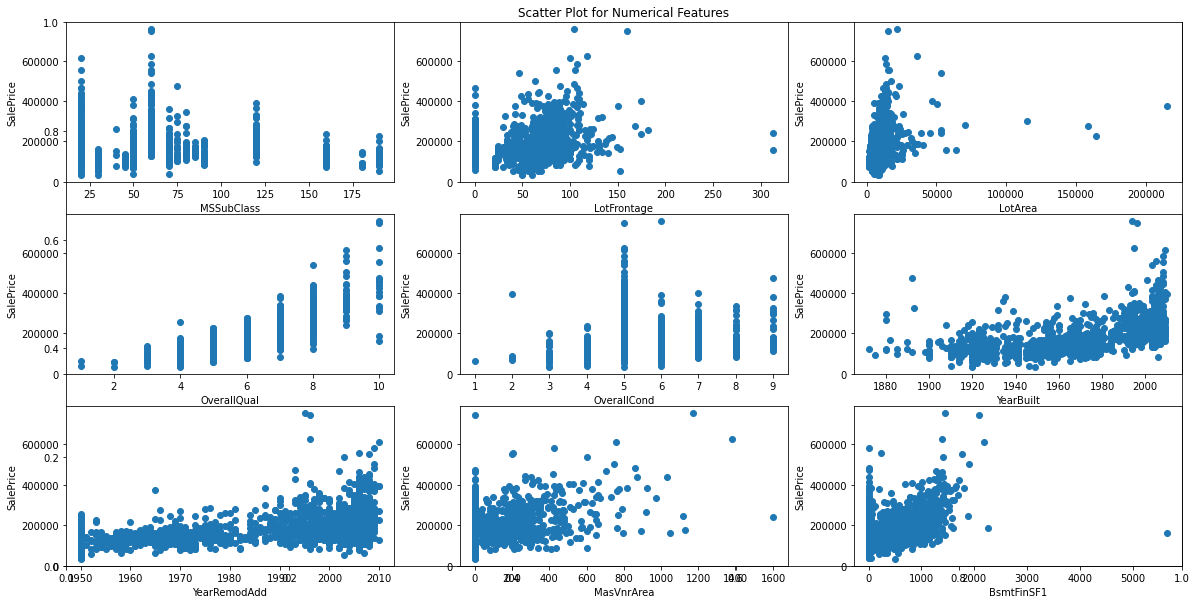

In [32]:
cnt = 0

figure = plt.figure(figsize=(20,10))
gs = figure.add_gridspec(3,3)
plt.title('Scatter Plot for Numerical Features')
for i in range(3):
    for j in range(3):
        figure.add_subplot(gs[i,j])
        plt.scatter(raw_training_dataset[numerical_features[cnt]], raw_training_dataset['SalePrice'])
        plt.xlabel(numerical_features[cnt])
        plt.ylabel('SalePrice')
        cnt+=1

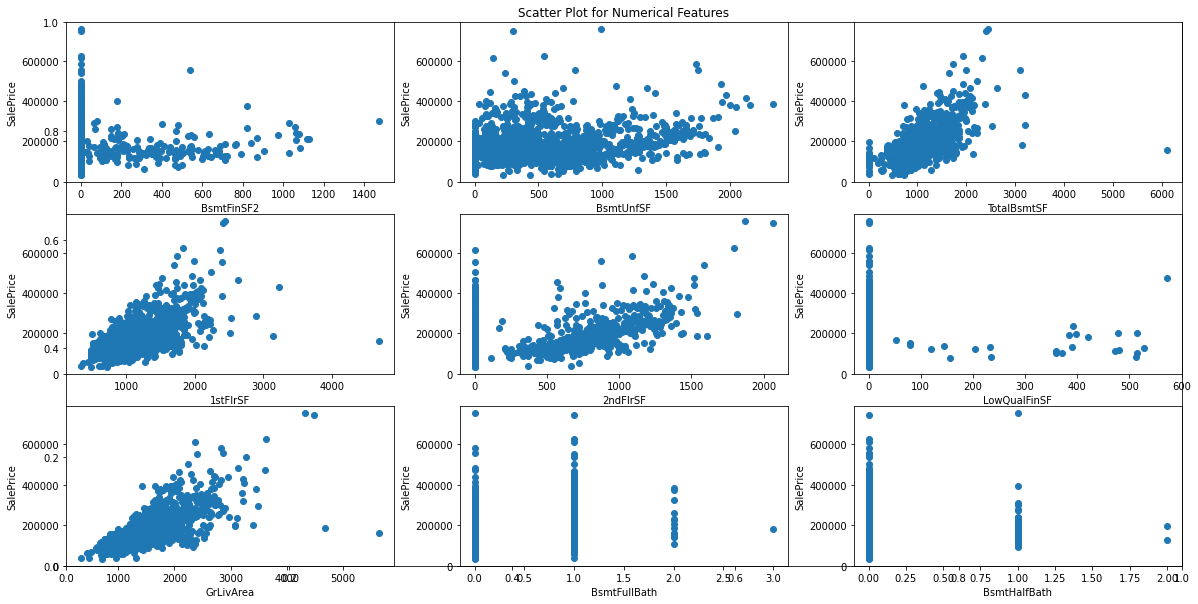

In [33]:
cnt = 9

figure = plt.figure(figsize=(20,10))
gs = figure.add_gridspec(3,3)
plt.title('Scatter Plot for Numerical Features')
for i in range(3):
    for j in range(3):
        figure.add_subplot(gs[i,j])
        plt.scatter(raw_training_dataset[numerical_features[cnt]], raw_training_dataset['SalePrice'])
        plt.xlabel(numerical_features[cnt])
        plt.ylabel('SalePrice')
        cnt+=1

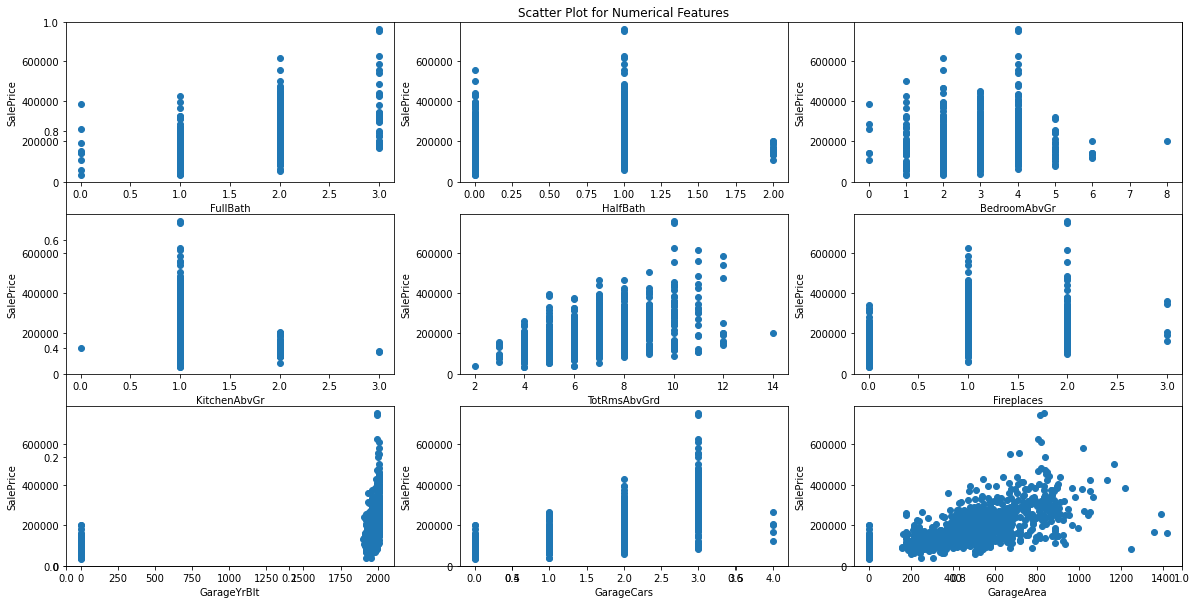

In [34]:
cnt = 18

figure = plt.figure(figsize=(20,10))
gs = figure.add_gridspec(3,3)
plt.title('Scatter Plot for Numerical Features')
for i in range(3):
    for j in range(3):
        figure.add_subplot(gs[i,j])
        plt.scatter(raw_training_dataset[numerical_features[cnt]], raw_training_dataset['SalePrice'])
        plt.xlabel(numerical_features[cnt])
        plt.ylabel('SalePrice')
        cnt+=1

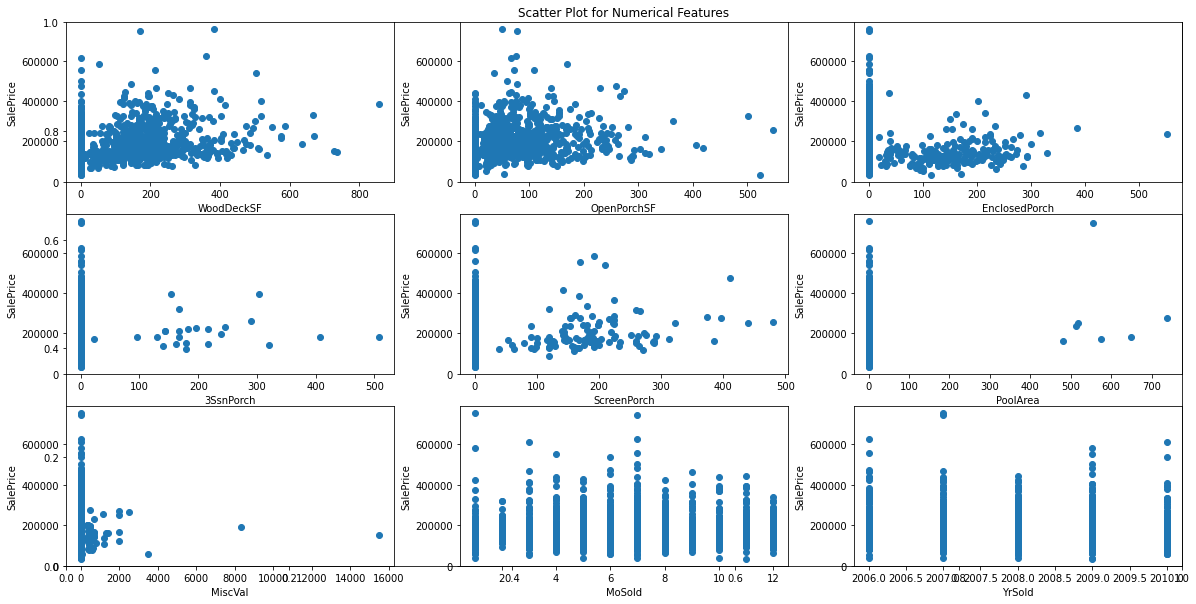

In [35]:
cnt = 27

figure = plt.figure(figsize=(20,10))
gs = figure.add_gridspec(3,3)
plt.title('Scatter Plot for Numerical Features')
for i in range(3):
    for j in range(3):
        figure.add_subplot(gs[i,j])
        plt.scatter(raw_training_dataset[numerical_features[cnt]], raw_training_dataset['SalePrice'])
        plt.xlabel(numerical_features[cnt])
        plt.ylabel('SalePrice')
        cnt+=1